# Import necessary libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset

In [31]:
data = {
    'timestamp': pd.date_range(start='2024-01-01', periods=100, freq='H'),
    'temperature': np.random.normal(loc=70, scale=5, size=100),
    'pressure': np.random.normal(loc=30, scale=2, size=100),
    'failure': np.random.choice([0, 1], size=100)  # 0: No failure, 1: Failure
}
df = pd.DataFrame(data)

# Ensure timestamp is in datetime format

In [32]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set timestamp as index

In [33]:
df.set_index('timestamp', inplace=True)

# Display the first few rows of the dataframe

In [34]:
print("Original Data:")
print(df.head())

Original Data:
                     temperature   pressure  failure
timestamp                                           
2024-01-01 00:00:00    68.620952  31.313767        1
2024-01-01 01:00:00    64.712344  31.583298        1
2024-01-01 02:00:00    66.982819  29.866247        0
2024-01-01 03:00:00    68.714389  28.672748        1
2024-01-01 04:00:00    76.815766  34.382132        0


# 1. Time-Based Features

In [35]:
df['time_since_last_failure'] = df['failure'].cumsum().shift(1).fillna(0)
df['failure_rate'] = df['failure'].rolling(window='7D').mean().fillna(0)
df['operational_time'] = (df.index - df.index.min()).total_seconds() / (60 * 60)  # Operational time in hours
df['hour_of_day'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month_of_year'] = df.index.month

# 2. Rolling Statistics

In [36]:
df['rolling_mean_temp_7d'] = df['temperature'].rolling(window='7D').mean()
df['rolling_std_temp_7d'] = df['temperature'].rolling(window='7D').std()
df['rolling_min_temp_7d'] = df['temperature'].rolling(window='7D').min()
df['rolling_max_temp_7d'] = df['temperature'].rolling(window='7D').max()

df['rolling_mean_pressure_30d'] = df['pressure'].rolling(window='30D').mean()
df['rolling_std_pressure_30d'] = df['pressure'].rolling(window='30D').std()
df['rolling_min_pressure_30d'] = df['pressure'].rolling(window='30D').min()
df['rolling_max_pressure_30d'] = df['pressure'].rolling(window='30D').max()

# Exponential Moving Average (EMA)

In [37]:
df['ema_temp_30d'] = df['temperature'].ewm(span=30).mean()


# 3. Lagged Features

In [38]:

df['lagged_temp_1d'] = df['temperature'].shift(24)
df['lagged_pressure_3d'] = df['pressure'].shift(24*3)
df['diff_temp_1d'] = df['temperature'] - df['lagged_temp_1d']
df['diff_pressure_3d'] = df['pressure'] - df['lagged_pressure_3d']

In [39]:
# 4. Interaction Features
df['temp_pressure_interaction'] = df['temperature'] * df['pressure']
df['temp_pressure_ratio'] = df['temperature'] / (df['pressure'] + 1e-5)  # Adding small value to avoid division by zero

# 5. Categorical Features
df['failure_code'] = df['failure'].astype(str)
df['maintenance_action'] = np.random.choice(['None', 'Routine', 'Emergency'], size=len(df))  # Example maintenance actions

# 6. Derived Features
df['stress_index'] = (df['temperature'] - df['temperature'].mean()) / df['temperature'].std()
df['health_score'] = 100 - (df['temperature'] / df['temperature'].max()) * 100

# 7. Aggregated Features
df['total_runtime'] = df.index.to_series().diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds().cumsum() / (60 * 60)  # Runtime in hours
df['usage_frequency'] = df['temperature'].rolling(window='1D').count()  # Frequency of measurements

# 8. Anomaly Detection Features
df['z_score_temp'] = (df['temperature'] - df['temperature'].mean()) / df['temperature'].std()
df['anomaly_indicator'] = (df['z_score_temp'].abs() > 3).astype(int)  

# Display the updated dataframe with new features

In [40]:
print("Data with New Features:")
print(df.head())

Data with New Features:
                     temperature   pressure  failure  time_since_last_failure  \
timestamp                                                                       
2024-01-01 00:00:00    68.620952  31.313767        1                      0.0   
2024-01-01 01:00:00    64.712344  31.583298        1                      1.0   
2024-01-01 02:00:00    66.982819  29.866247        0                      2.0   
2024-01-01 03:00:00    68.714389  28.672748        1                      2.0   
2024-01-01 04:00:00    76.815766  34.382132        0                      3.0   

                     failure_rate  operational_time  hour_of_day  day_of_week  \
timestamp                                                                       
2024-01-01 00:00:00      1.000000               0.0            0            0   
2024-01-01 01:00:00      1.000000               1.0            1            0   
2024-01-01 02:00:00      0.666667               2.0            2            0   
202

# Save the dataframe with new features to a CSV file

In [41]:
df.to_csv('equipment_failure_with_features.csv')

# Plotting feature to visualize

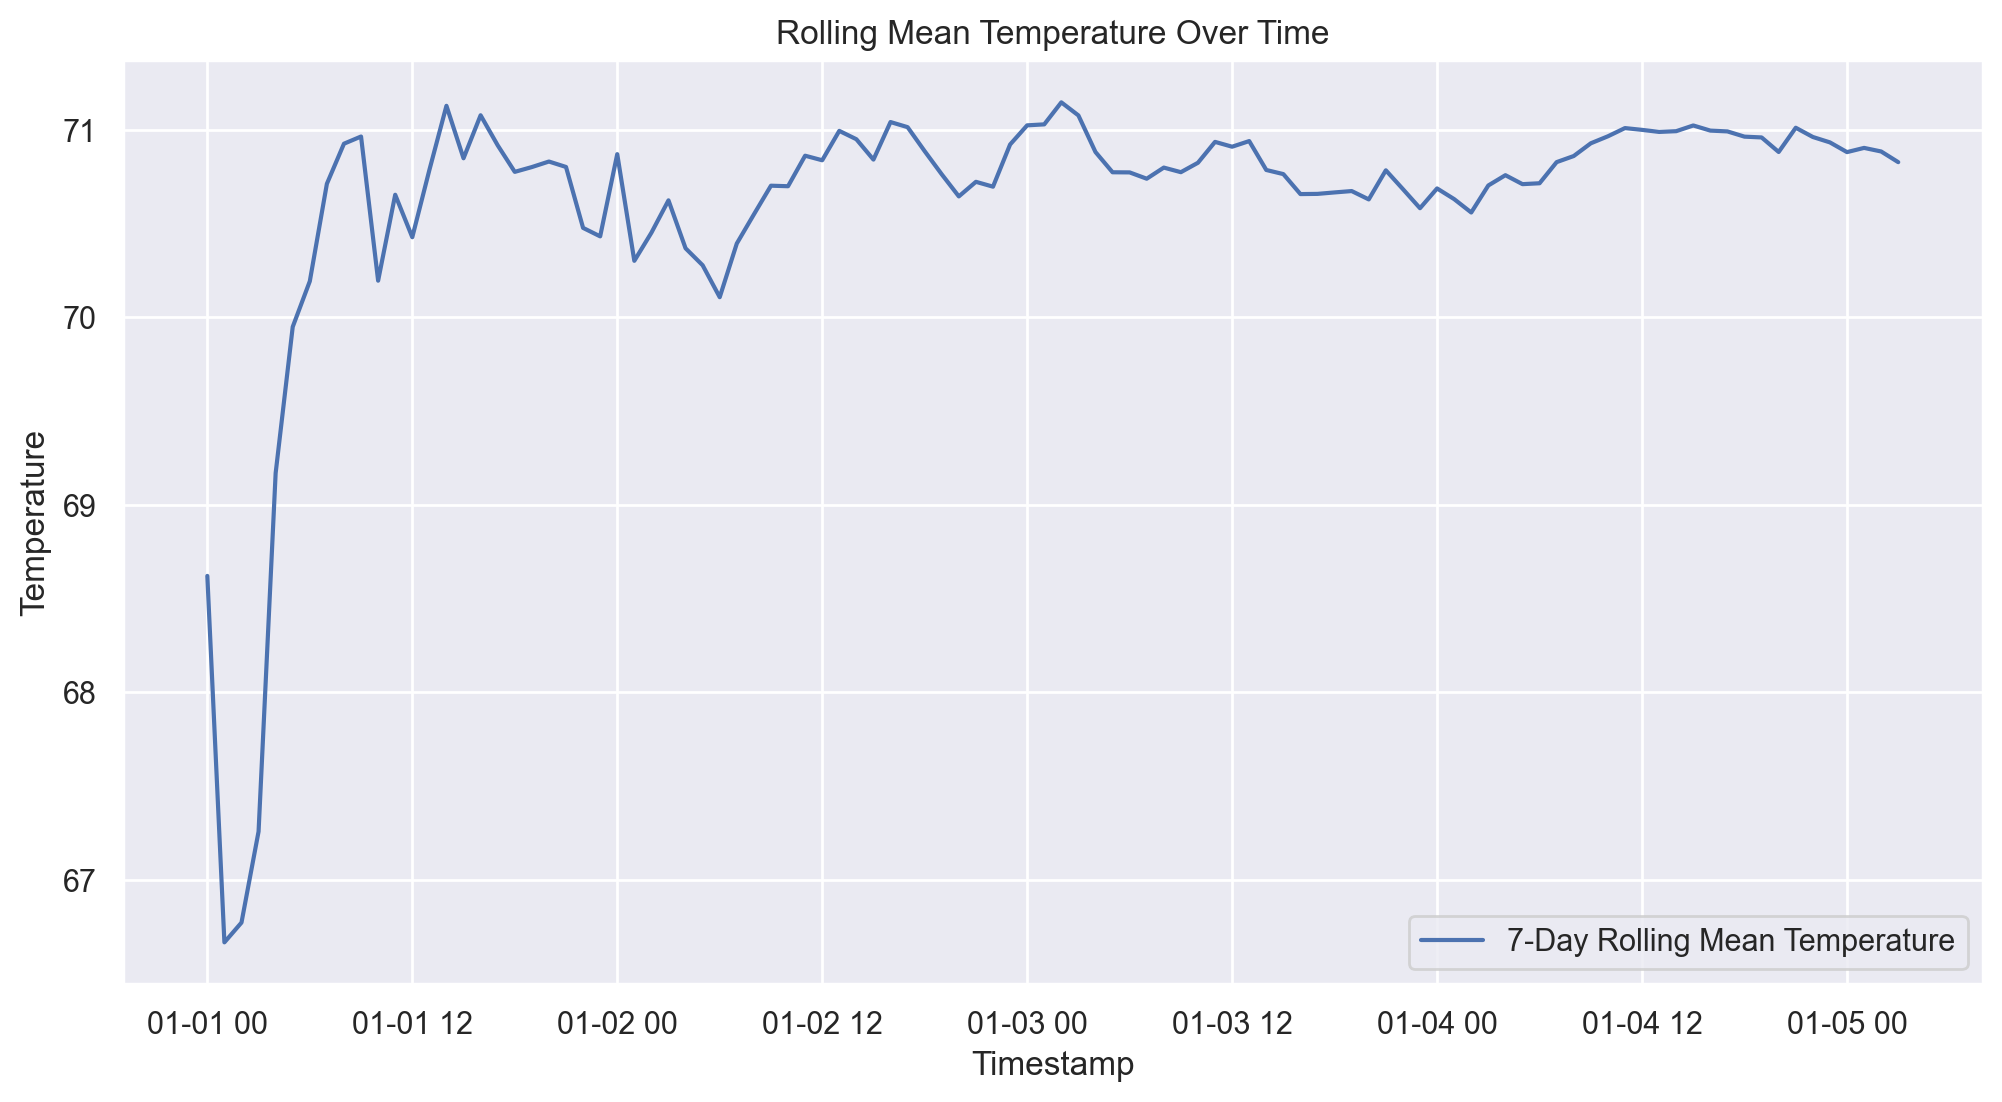

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['rolling_mean_temp_7d'], label='7-Day Rolling Mean Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Rolling Mean Temperature Over Time')
plt.legend()
plt.show()